# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate the Cities List by Using the `citipy` Library

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1800)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1800)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

709

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set up base url
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key
#units = "imperial"

# Set counters for data looping
record = 0
sets = 1

# Create empty lists
city_list = []
lat_list = []
lng_list = []
maxtemp_list = []
humidity_list = []
cloudiness_list = []
windspeed_list = []
country_list = []
date_list = []

print("Beginning Data Retrieval")
print("-----------------------------")

# Get weather data for cities
for index, city in enumerate(cities):
    
    # Set query url to generate json response for cities
    query_url = url + "&q=" + city
    response = requests.get(query_url).json()
    
    try:
        city_list.append(response["name"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        maxtemp_list.append(response["main"]["temp_max"])
        humidity_list.append(response["main"]["humidity"])
        cloudiness_list.append(response["clouds"]["all"])
        windspeed_list.append(response["wind"]["speed"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        
        # New set when record hits 50
        if record == 50:
            record = 0
            sets = sets + 1
        
        # Append record counter
        else:
            record = record + 1
        
        # Print data
        print(f"Processing Record {record} of Set {sets} | {city}")
        
    except:
        print("City not found. Skipping to next available city.")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | portland
Processing Record 3 of Set 1 | saint-philippe
Processing Record 4 of Set 1 | atafu village
Processing Record 5 of Set 1 | khandyga
City not found. Skipping to next available city.
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | hajjah
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | regina
Processing Record 11 of Set 1 | hawaiian paradise park
Processing Record 12 of Set 1 | hola
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | nabire
Processing Record 15 of Set 1 | midvagur
Processing Record 16 of Set 1 | constantia
Processing Record 17 of Set 1 | qaqortoq
Processing Record 18 of Set 1 | weno
Processing Record 19 of Set 1 | lerwick
Processing Record 20 of Set 1 | prineville
Processing Record 21 of Set 1 | bilibino
Processing Reco

Processing Record 37 of Set 4 | magong
City not found. Skipping to next available city.
Processing Record 38 of Set 4 | kidal
Processing Record 39 of Set 4 | labytnangi
Processing Record 40 of Set 4 | berezovyy
Processing Record 41 of Set 4 | konkwesso
Processing Record 42 of Set 4 | haiku-pauwela
Processing Record 43 of Set 4 | san julian
Processing Record 44 of Set 4 | big bend
Processing Record 45 of Set 4 | georgetown
Processing Record 46 of Set 4 | santo antonio
Processing Record 47 of Set 4 | nouadhibou
Processing Record 48 of Set 4 | guerrero negro
Processing Record 49 of Set 4 | sambava
Processing Record 50 of Set 4 | shenjiamen
Processing Record 0 of Set 5 | madimba
Processing Record 1 of Set 5 | balaipungut
Processing Record 2 of Set 5 | puerto baquerizo moreno
Processing Record 3 of Set 5 | port lincoln
Processing Record 4 of Set 5 | arica
Processing Record 5 of Set 5 | mount isa
Processing Record 6 of Set 5 | isiro
Processing Record 7 of Set 5 | sitia
Processing Record 8 of

Processing Record 22 of Set 8 | karasuk
Processing Record 23 of Set 8 | naze
Processing Record 24 of Set 8 | akrehamn
Processing Record 25 of Set 8 | mossel bay
Processing Record 26 of Set 8 | zhangatas
Processing Record 27 of Set 8 | macas
Processing Record 28 of Set 8 | verkhnevilyuysk
Processing Record 29 of Set 8 | bikenibeu village
Processing Record 30 of Set 8 | guerrero
Processing Record 31 of Set 8 | sumenep
Processing Record 32 of Set 8 | jan kempdorp
Processing Record 33 of Set 8 | arteche
Processing Record 34 of Set 8 | tangalle
Processing Record 35 of Set 8 | hasaki
Processing Record 36 of Set 8 | whangarei
Processing Record 37 of Set 8 | fort mcmurray
Processing Record 38 of Set 8 | farafenni
Processing Record 39 of Set 8 | fort st. john
Processing Record 40 of Set 8 | port isabel
Processing Record 41 of Set 8 | alice springs
Processing Record 42 of Set 8 | ormara
Processing Record 43 of Set 8 | motta sant'anastasia
Processing Record 44 of Set 8 | auki
Processing Record 45

Processing Record 3 of Set 12 | ponta delgada
Processing Record 4 of Set 12 | khawr fakkan
City not found. Skipping to next available city.
Processing Record 5 of Set 12 | villanueva
Processing Record 6 of Set 12 | taoudenni
Processing Record 7 of Set 12 | zaozersk
Processing Record 8 of Set 12 | weyburn
Processing Record 9 of Set 12 | nuuk
Processing Record 10 of Set 12 | kingston
Processing Record 11 of Set 12 | amparafaravola
Processing Record 12 of Set 12 | shalkar
Processing Record 13 of Set 12 | safi
City not found. Skipping to next available city.
Processing Record 14 of Set 12 | melilla
Processing Record 15 of Set 12 | weinzierl bei krems
Processing Record 16 of Set 12 | hammerfest
Processing Record 17 of Set 12 | mogadishu
Processing Record 18 of Set 12 | island harbour
Processing Record 19 of Set 12 | santiago de cao
Processing Record 20 of Set 12 | paramirim
Processing Record 21 of Set 12 | pyt-yakh
Processing Record 22 of Set 12 | howard springs
Processing Record 23 of Set 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
df = pd.DataFrame({
    "City": city_list,
    "Lat": lat_list,
    "Lng": lng_list,
    "Max Temp": maxtemp_list,
    "Humidity": humidity_list,
    "Cloudiness": cloudiness_list,
    "Wind Speed": windspeed_list,
    "Country": country_list,
    "Date": date_list
})

# Show Record Count
df.count()

City          681
Lat           681
Lng           681
Max Temp      681
Humidity      681
Cloudiness    681
Wind Speed    681
Country       681
Date          681
dtype: int64

In [5]:
# Display sample data
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.4560,-114.3525,61.32,51,40,12.66,CA,1685212436
1,Portland,45.5234,-122.6762,70.61,61,75,3.44,US,1685212445
2,Saint-Philippe,-21.3585,55.7679,72.99,84,98,14.25,RE,1685212468
3,Atafu Village,-8.5421,-172.5159,83.43,76,5,10.76,TK,1685212476
4,Khandyga,62.6667,135.6000,38.37,93,11,3.15,RU,1685212520


In [6]:
# Export the City_Data into a csv
df.to_csv("output_data/city_weather.csv", index=False)

In [7]:
# Read saved data
df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,62.4560,241.44,75,20,5.14,CA,1675216141
1,mataura,-46.1927,-46.1927,295.63,68,100,1.52,NZ,1675216142
2,gigmoto,13.7796,13.7796,299.78,85,34,5.26,PH,1675216142
3,inongo,-1.9500,-1.9500,296.28,80,91,1.79,CD,1675216142
4,mount gambier,-37.8333,-37.8333,291.57,42,88,4.52,AU,1675216143


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

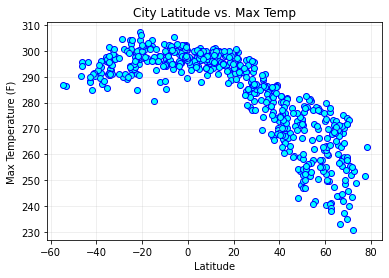

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(df["Lat"], df["Max Temp"], facecolor="aqua", edgecolor="b")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(alpha=0.25)

# Save the figure
plt.savefig("output_data/lat_vs_temp_plot.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

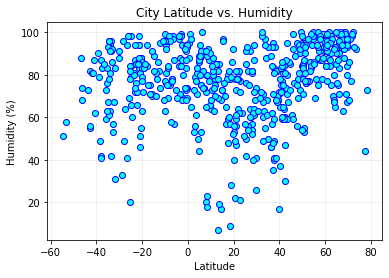

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(df["Lat"], df["Humidity"], facecolor="aqua", edgecolor="b")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(alpha=0.25)

# Save the figure
plt.savefig("output_data/lat_vs_humidity_plot.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

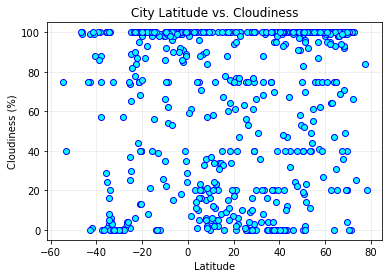

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(df["Lat"], df["Cloudiness"], facecolor="aqua", edgecolor="b")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(alpha=0.25)

# Save the figure
plt.savefig("output_data/lat_vs_cloudiness_plot.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

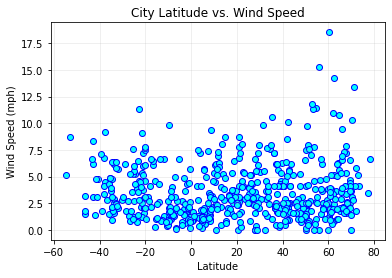

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(df["Lat"], df["Wind Speed"], facecolor="aqua", edgecolor="b")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(alpha=0.25)

# Save the figure
plt.savefig("output_data/lat_vs_wind_plot.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = df[df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,62.4560,241.44,75,20,5.14,CA,1675216141
2,gigmoto,13.7796,13.7796,299.78,85,34,5.26,PH,1675216142
7,columbus,39.9612,39.9612,268.54,71,100,4.12,US,1675215965
8,thompson,55.7435,55.7435,242.24,69,75,0.00,CA,1675215860
9,barrow,71.2906,71.2906,252.16,77,0,13.38,US,1675216144


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = df[df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mataura,-46.1927,-46.1927,295.63,68,100,1.52,NZ,1675216142
3,inongo,-1.9500,-1.9500,296.28,80,91,1.79,CD,1675216142
4,mount gambier,-37.8333,-37.8333,291.57,42,88,4.52,AU,1675216143
5,kaitangata,-46.2817,-46.2817,293.98,74,99,3.16,NZ,1675216143
6,punta arenas,-53.1500,-53.1500,286.21,58,40,8.75,CL,1675216143


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.40840957198409067


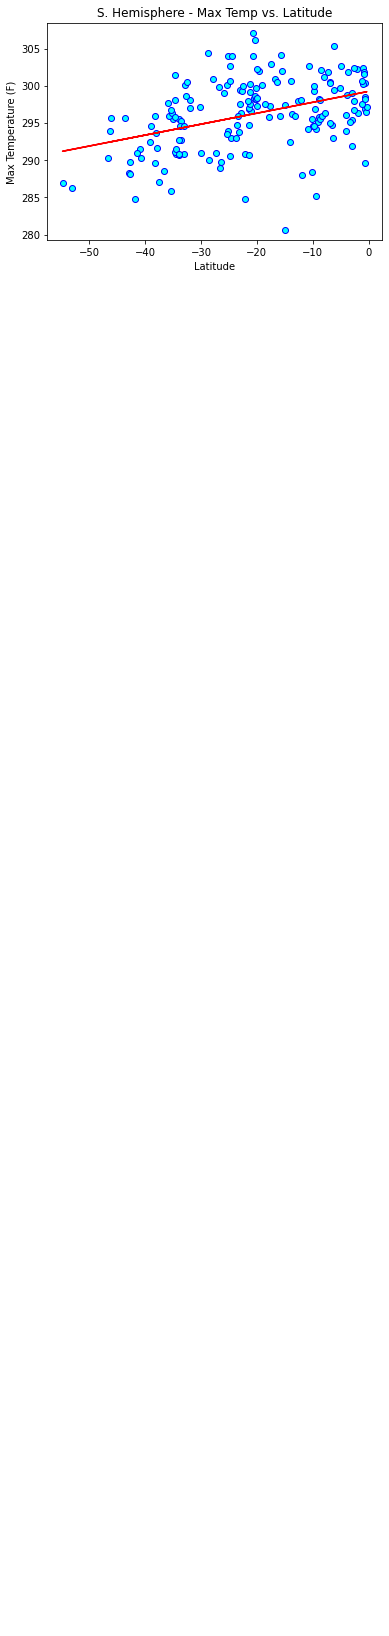

The r-value is: -0.8598267393199169


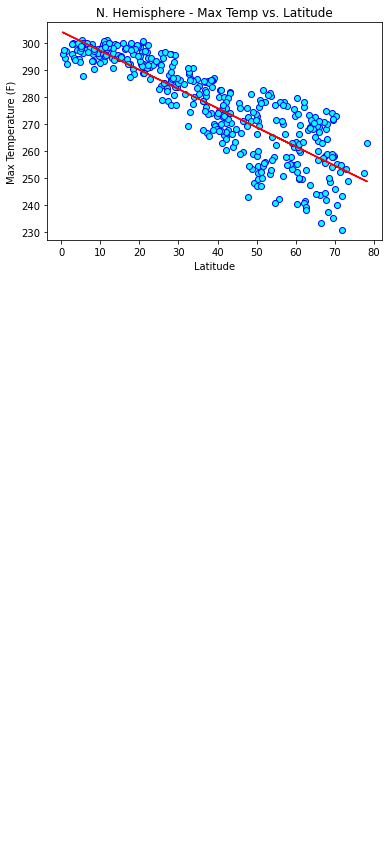

In [14]:
# Southern Hemisphere
# Define X and Y values for the regression
x_vals = southern_hemi_df["Lat"]
y_vals = southern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Plot the regression line
plt.scatter(x_vals,y_vals, facecolor="aqua", edgecolor="b")
plt.plot(x_vals,regress_vals,"r-")

# Add labels, title, and annotations
plt.title("S. Hemisphere - Max Temp vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(line_eq,(-55,93),fontsize=15,color="red")

# Print the correlation coefficient
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()


# Northern Hemisphere
# Define X and Y values for the regression
x_vals = northern_hemi_df["Lat"]
y_vals = northern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Plot the regression line
plt.scatter(x_vals,y_vals, facecolor="aqua", edgecolor="b")
plt.plot(x_vals,regress_vals,"r-")

# Add labels, title, and annotations
plt.title("N. Hemisphere - Max Temp vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(line_eq,(0,0),fontsize=15,color="red")

# Print the correlation coefficient
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.27446419302086317


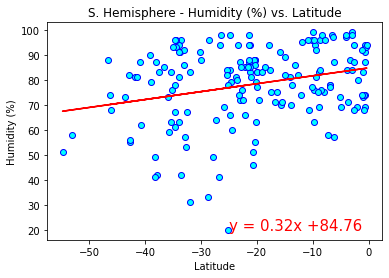

The r-value is: 0.372548593648481


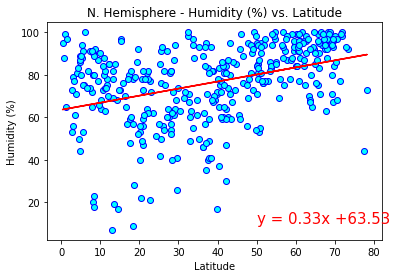

In [15]:
# Southern Hemisphere
# Define X and Y values for the regression
x_vals = southern_hemi_df["Lat"]
y_vals = southern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Plot the regression line
plt.scatter(x_vals,y_vals, facecolor="aqua", edgecolor="b")
plt.plot(x_vals,regress_vals,"r-")

# Add labels, title, and annotations
plt.title("S. Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(-25,20),fontsize=15,color="red")

# Print the correlation coefficient
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()



# Northern Hemisphere
# Define X and Y values for the regression
x_vals = northern_hemi_df["Lat"]
y_vals = northern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Plot the regression line
plt.scatter(x_vals,y_vals, facecolor="aqua", edgecolor="b")
plt.plot(x_vals,regress_vals,"r-")

# Add labels, title, and annotations
plt.title("N. Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(50,10),fontsize=15,color="red")

# Print the correlation coefficient
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.09256163196553126


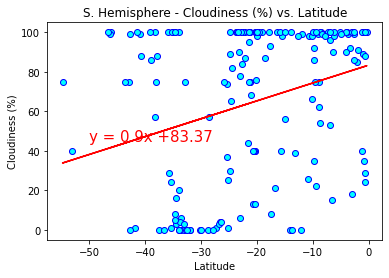

The r-value is: 0.3187897567328794


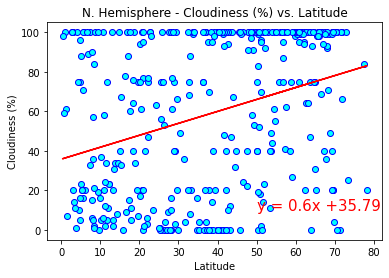

In [16]:
# Southern Hemisphere
# Define X and Y values for the regression
x_vals = southern_hemi_df["Lat"]
y_vals = southern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Plot the regression line
plt.scatter(x_vals,y_vals, facecolor="aqua", edgecolor="b")
plt.plot(x_vals,regress_vals,"r-")

# Add labels, title, and annotations
plt.title("S. Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(-50,45),fontsize=15,color="red")

# Print the correlation coefficient
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()


# Northern Hemisphere
# Define X and Y values for the regression
x_vals = northern_hemi_df["Lat"]
y_vals = northern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Plot the regression line
plt.scatter(x_vals,y_vals, facecolor="aqua", edgecolor="b")
plt.plot(x_vals,regress_vals,"r-")

# Add labels, title, and annotations
plt.title("N. Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(50,10),fontsize=15,color="red")

# Print the correlation coefficient
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.3485211857727312


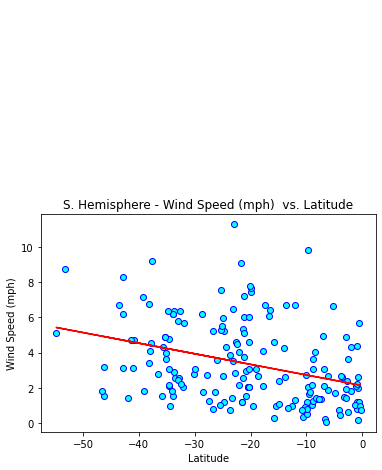

The r-value is: 0.11452610637998038


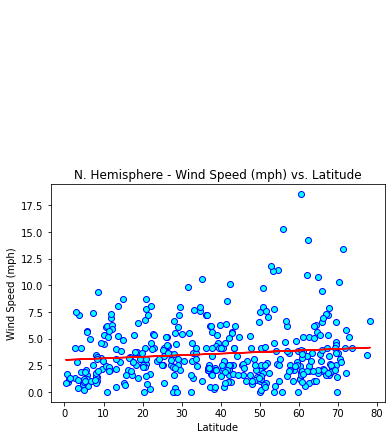

In [17]:
# Southern Hemisphere
# Define X and Y values for the regression
x_vals = southern_hemi_df["Lat"]
y_vals = southern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Plot the regression line
plt.scatter(x_vals,y_vals, facecolor="aqua", edgecolor="b")
plt.plot(x_vals,regress_vals,"r-")

# Add labels, title, and annotations
plt.title("S. Hemisphere - Wind Speed (mph)  vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(-25,23),fontsize=15,color="red")

# Print the correlation coefficient
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()


x_vals = northern_hemi_df["Lat"]
y_vals = northern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Plot the regression line
plt.scatter(x_vals,y_vals, facecolor="aqua", edgecolor="b")
plt.plot(x_vals,regress_vals,"r-")

# Add labels, title, and annotations
plt.title("N. Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(5,35),fontsize=15,color="red")

# Print the correlation coefficient
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()